## Illustration of local differential privacy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def laplace_mechanism(data, sensitivity, epsilon):
    """
    Apply Laplace mechanism to the data.
    
    Parameters:
        data (float or array-like): The data to which noise will be added.
        sensitivity (float): The sensitivity of the function being computed.
        epsilon (float): The privacy parameter controlling the amount of noise added.
        
    Returns:
        Noisy result of the computation.
    """
    beta = sensitivity / epsilon
    noise = np.random.laplace(0, beta, size=data.shape) if isinstance(data, np.ndarray) else np.random.laplace(0, beta)
    return data + noise

def estimate_mean(private_data):
    """
    Estimate the mean from the private data.
    
    Parameters:
        private_data (array-like): The private data.
        
    Returns:
        Estimated mean.
    """
    return np.mean(private_data)

def mean_squared_error(true_value, estimated_value):
    """
    Compute the mean squared error between true and estimated values.
    
    Parameters:
        true_value (float): The true value.
        estimated_value (float): The estimated value.
        
    Returns:
        Mean squared error.
    """
    return np.mean((true_value - estimated_value)**2)

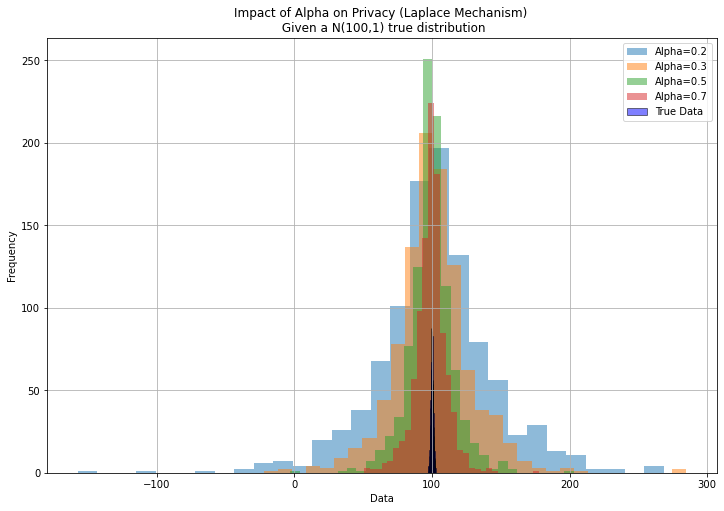

In [3]:
# Generate true data
np.random.seed(0)  # For reproducibility
true_data = np.random.normal(loc=100, scale=1, size=1000)  # Generate 1000 data points

# Parameters
sensitivity = np.max(true_data) - np.min(true_data)  # Sensitivity is the range of the data
alphas = [0.2,0.3, 0.5, 0.7]  # Different alpha values

# Plotting
plt.figure(figsize=(12, 8))
for alpha in alphas:
    # Generate private data for each alpha
    private_data = laplace_mechanism(true_data, sensitivity, alpha)
    plt.hist(private_data, bins=30, alpha=0.5, label=f'Alpha={alpha}')

    
plt.hist(true_data, bins=30, alpha=0.5, color='blue', label='True Data', edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Impact of Alpha on Privacy (Laplace Mechanism) \n Given a N(100,1) true distribution')
plt.legend()
plt.grid(True)
plt.show()

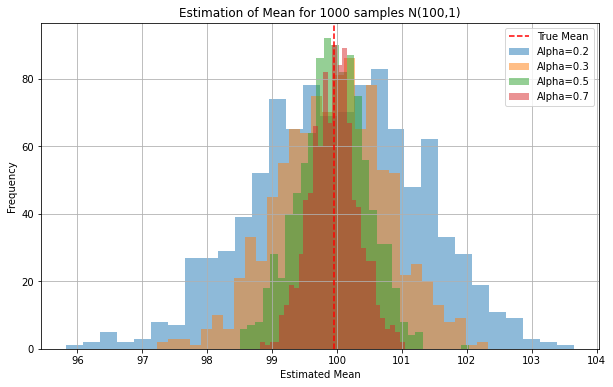

In [4]:
# Generate true data
np.random.seed(0)  # For reproducibility
true_data = np.random.normal(loc=100, scale=1, size=1000)  # Generate 1000 data points

# Parameters
true_mean = np.mean(true_data)  # True mean of the data
sensitivity = np.max(true_data) - np.min(true_data)  # Sensitivity is the range of the data
alphas = [0.2, 0.3, 0.5, 0.7]  # Different alpha values

# Number of experiments
num_experiments = 1000

# Estimate means for different alphas
estimated_means = []
for alpha in alphas:
    # Generate private data for each alpha
    private_means = []
    for _ in range(num_experiments):
        private_data = laplace_mechanism(true_data, sensitivity, alpha)
        private_mean = estimate_mean(private_data)
        private_means.append(private_mean)
    estimated_means.append(private_means)

# Plotting
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    plt.hist(estimated_means[i], bins=30, alpha=0.5, label=f'Alpha={alpha}')
plt.axvline(x=true_mean, color='r', linestyle='--', label='True Mean')
plt.xlabel('Estimated Mean')
plt.ylabel('Frequency')
plt.title('Estimation of Mean for 1000 samples N(100,1)')
plt.legend()
plt.grid(True)
plt.show()

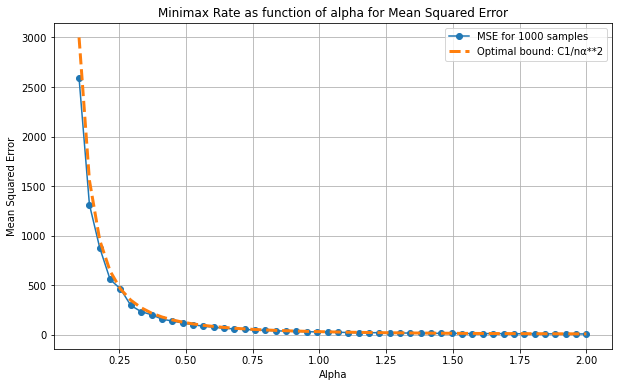

In [5]:
# Generate true data
np.random.seed(0)  # For reproducibility
true_data = np.random.normal(loc=100, scale=20, size=1000)  # Generate 1000 data points

# Parameters
true_mean = np.mean(true_data)  # True mean of the data
sensitivity = np.max(true_data) - np.min(true_data)  # Sensitivity is the range of the data
alphas = np.linspace(0.1, 2.0, 50)  # Different alpha values

# Number of experiments
num_experiments = 1000

# Compute MSE for different alphas
mse_values = []
for alpha in alphas:
    # Generate private data for each alpha
    mse_for_alpha = []
    for _ in range(num_experiments):
        private_data = laplace_mechanism(true_data, sensitivity, alpha)
        private_mean = estimate_mean(private_data)
        mse = mean_squared_error(true_mean, private_mean)
        mse_for_alpha.append(mse)
    mse_values.append(np.mean(mse_for_alpha))
    
inverse_nalpha2 = 30000 / (1000*alphas**2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, marker='o', label='MSE for 1000 samples')
plt.plot(alphas, inverse_nalpha2, label='Optimal bound: C1/nα**2', linestyle='dashed', linewidth=3)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Minimax Rate as function of alpha for Mean Squared Error')
plt.grid(True)
plt.legend()
plt.show()

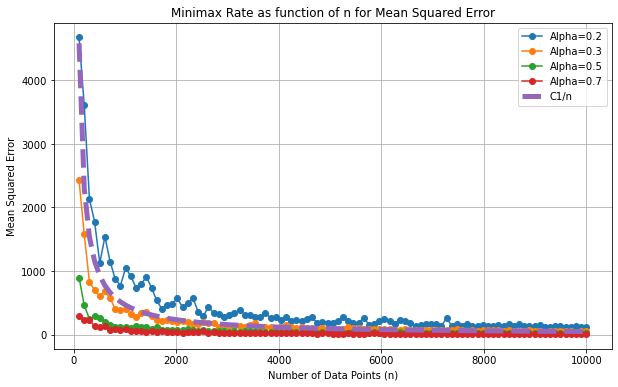

In [6]:
# Parameters
np.random.seed(0)  # For reproducibility
alphas = [0.2,0.3, 0.5, 0.7]  # Different alpha values
num_experiments = 1000  # Number of experiments for each combination of n and alpha
# Values of n
nb_n = 10000
nb_samples = 100
n_values_plot = np.linspace(1, nb_n, nb_samples)  # Example range from 1 to 1000
bin_width = nb_n/nb_samples


# Compute MSE for different n and alphas
mse_values = {alpha: [] for alpha in alphas}  # Dictionary to store MSE values for each alpha
for alpha in alphas:
    for n in n_values_plot.astype(int):
        # Compute 1/n
        true_data = np.random.normal(loc=100, scale=20, size=n)  # Generate n data points
        
        true_mean = np.mean(true_data)  # True mean of the data
        sensitivity = np.max(true_data) - np.min(true_data)  # Sensitivity is the range of the data
        
        mse_for_n = []
        for _ in range(num_experiments):
            private_data = laplace_mechanism(true_data, sensitivity, alpha)
            private_mean = estimate_mean(private_data)
            mse = mean_squared_error(true_mean, private_mean)
            mse_for_n.append(mse)
        mse_values[alpha].append(np.mean(mse_for_n))

inverse_n = (mse_values[alphas[0]][1]*bin_width) / n_values_plot
inverse_n[0] = 0 
# Plotting
plt.figure(figsize=(10, 6))
for alpha in alphas:
    # inverse_nalpha2 = (mse_values[alpha][1]*201) / (n_values_plot*alpha**2)
    plt.plot(n_values_plot[1:], mse_values[alpha][1:], marker='o', label=f'Alpha={alpha}')
    # plt.plot(n_values_plot[1:], inverse_nalpha2[1:], label='C1/n' + str(alpha) + '^2', linestyle='dashed', linewidth=3)
plt.plot(n_values_plot[1:], inverse_n[1:], label='C1/n', linestyle='dashed', linewidth=5)
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Mean Squared Error')
plt.title('Minimax Rate as function of n for Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()